# Data Pricing - Lista 5

In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ml_libs import regressao_linear_GD as RLGD
from ml_libs import metricas
from ml_libs import standardization_normalization as std_norm
from importlib import reload
from sklearn import linear_model

In [3]:
#this line serves to you dont have to reload every time you execute this code
reload(RLGD)
reload(metricas)
reload(std_norm);

## Setting columns of dataframe

In [4]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#df = pd.read_csv('housing.csv', names=cols)
df = pd.read_csv('housing.csv', delim_whitespace=True, names=cols)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.shape

(506, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [8]:
# Setting precision for 4 decimal places
pd.set_option('precision',4)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000
mean,3.6135,11.3636,11.1368,0.0692,0.5547,6.2846,68.5749,3.7950,9.5494,408.2372,18.4555,356.6740,12.6531,22.5328
std,8.6015,23.3225,6.8604,0.2540,0.1159,0.7026,28.1489,2.1057,8.7073,168.5371,2.1649,91.2949,7.1411,9.1971
min,0.0063,0.0000,0.4600,0.0000,0.3850,3.5610,2.9000,1.1296,1.0000,187.0000,12.6000,0.3200,1.7300,5.0000
25%,0.0820,0.0000,5.1900,0.0000,0.4490,5.8855,45.0250,2.1002,4.0000,279.0000,17.4000,375.3775,6.9500,17.0250
50%,0.2565,0.0000,9.6900,0.0000,0.5380,6.2085,77.5000,3.2074,5.0000,330.0000,19.0500,391.4400,11.3600,21.2000
75%,3.6771,12.5000,18.1000,0.0000,0.6240,6.6235,94.0750,5.1884,24.0000,666.0000,20.2000,396.2250,16.9550,25.0000
max,88.9762,100.0000,27.7400,1.0000,0.8710,8.7800,100.0000,12.1265,24.0000,711.0000,22.0000,396.9000,37.9700,50.0000


## Histogram of dataframe

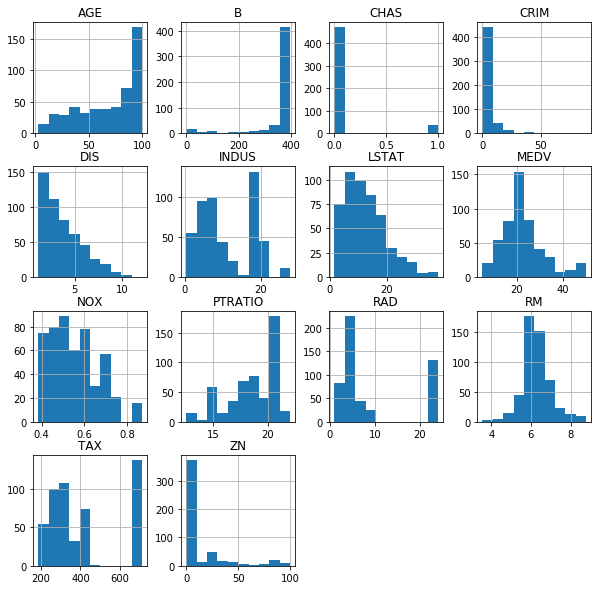

In [9]:
# Data visualizations

# histograms
df.hist(figsize=(10,10))
plt.show()

## Correlation analisis

In [10]:
## Show correlation
df.corr().style.background_gradient(cmap='RdYlGn').set_precision(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1,-0.2005,0.4066,-0.05589,0.421,-0.2192,0.3527,-0.3797,0.6255,0.5828,0.2899,-0.3851,0.4556,-0.3883
ZN,-0.2005,1,-0.5338,-0.0427,-0.5166,0.312,-0.5695,0.6644,-0.3119,-0.3146,-0.3917,0.1755,-0.413,0.3604
INDUS,0.4066,-0.5338,1,0.06294,0.7637,-0.3917,0.6448,-0.708,0.5951,0.7208,0.3832,-0.357,0.6038,-0.4837
CHAS,-0.05589,-0.0427,0.06294,1,0.0912,0.09125,0.08652,-0.09918,-0.007368,-0.03559,-0.1215,0.04879,-0.05393,0.1753
NOX,0.421,-0.5166,0.7637,0.0912,1,-0.3022,0.7315,-0.7692,0.6114,0.668,0.1889,-0.3801,0.5909,-0.4273
RM,-0.2192,0.312,-0.3917,0.09125,-0.3022,1,-0.2403,0.2052,-0.2098,-0.292,-0.3555,0.1281,-0.6138,0.6954
AGE,0.3527,-0.5695,0.6448,0.08652,0.7315,-0.2403,1,-0.7479,0.456,0.5065,0.2615,-0.2735,0.6023,-0.377
DIS,-0.3797,0.6644,-0.708,-0.09918,-0.7692,0.2052,-0.7479,1,-0.4946,-0.5344,-0.2325,0.2915,-0.497,0.2499
RAD,0.6255,-0.3119,0.5951,-0.007368,0.6114,-0.2098,0.456,-0.4946,1,0.9102,0.4647,-0.4444,0.4887,-0.3816
TAX,0.5828,-0.3146,0.7208,-0.03559,0.668,-0.292,0.5065,-0.5344,0.9102,1,0.4609,-0.4418,0.544,-0.4685


### Separation between features

In [11]:
X = df.values[:, :13]
y = df.values[:, 13]

### Random data using seed

In [12]:
rs = np.random.RandomState(1)
shuffled_indices = rs.permutation(X.shape[0])
#showing the first 39 indices shuffled
shuffled_indices[:39]

array([307, 343,  47,  67, 362, 132, 292,  31, 218,  90, 481, 344, 119,
        66, 312, 407, 376, 225, 201, 147, 315, 146, 314, 324,  65, 425,
        34, 345, 261, 389, 351, 245, 204, 447, 330, 494, 446,   4, 406])

In [13]:
## Updating X and y to new shuffled values
X = X[shuffled_indices]
y = y[shuffled_indices]

## normalizar depois x_train e x_test 
## e não standardizar ou normalizar o y


In [14]:
## Showing 5 first samples of X
X[:5]

array([[4.93200e-02, 3.30000e+01, 2.18000e+00, 0.00000e+00, 4.72000e-01,
        6.84900e+00, 7.03000e+01, 3.18270e+00, 7.00000e+00, 2.22000e+02,
        1.84000e+01, 3.96900e+02, 7.53000e+00],
       [2.54300e-02, 5.50000e+01, 3.78000e+00, 0.00000e+00, 4.84000e-01,
        6.69600e+00, 5.64000e+01, 5.73210e+00, 5.00000e+00, 3.70000e+02,
        1.76000e+01, 3.96900e+02, 7.18000e+00],
       [2.29270e-01, 0.00000e+00, 6.91000e+00, 0.00000e+00, 4.48000e-01,
        6.03000e+00, 8.55000e+01, 5.68940e+00, 3.00000e+00, 2.33000e+02,
        1.79000e+01, 3.92740e+02, 1.88000e+01],
       [5.78900e-02, 1.25000e+01, 6.07000e+00, 0.00000e+00, 4.09000e-01,
        5.87800e+00, 2.14000e+01, 6.49800e+00, 4.00000e+00, 3.45000e+02,
        1.89000e+01, 3.96210e+02, 8.10000e+00],
       [3.67822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.70000e-01,
        5.36200e+00, 9.62000e+01, 2.10360e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.80790e+02, 1.01900e+01]])

### Setting dataset for trainning and test

In [15]:
n = int(round(len(y) * 0.70))
X_train = X[:n]
y_train = y[:n]
X_test = X[n:]
y_test = y[n:]

# defining train and test for X normalized
X_train_norm = std_norm.normalize(X[:n])
# X_test_norm = std_norm.normalize(X[n:])

# defining train and test for X standardized
X_train_std = std_norm.standardize(X[:n])
# X_test_std = std_norm.standardize(X[n:])

In [16]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((506, 13), (506,), (354, 13), (354,), (152, 13), (152,))

In [17]:
X_train

array([[4.93200e-02, 3.30000e+01, 2.18000e+00, ..., 1.84000e+01,
        3.96900e+02, 7.53000e+00],
       [2.54300e-02, 5.50000e+01, 3.78000e+00, ..., 1.76000e+01,
        3.96900e+02, 7.18000e+00],
       [2.29270e-01, 0.00000e+00, 6.91000e+00, ..., 1.79000e+01,
        3.92740e+02, 1.88000e+01],
       ...,
       [4.54192e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.74560e+02, 7.79000e+00],
       [3.56868e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.93370e+02, 1.43600e+01],
       [9.10300e-02, 0.00000e+00, 2.46000e+00, ..., 1.78000e+01,
        3.94120e+02, 4.82000e+00]])

In [18]:
X_train_std

array([[-0.41830914,  0.96001193, -1.31413135, ..., -0.06859077,
         0.45546789, -0.70083121],
       [-0.42106172,  1.91928483, -1.07918134, ..., -0.45248223,
         0.45546789, -0.75049774],
       [-0.39757552, -0.47889741, -0.61956037, ..., -0.30852293,
         0.41310181,  0.89843104],
       ...,
       [ 0.09932289, -0.47889741,  1.0236213 , ...,  0.79516499,
         0.22795388, -0.66393608],
       [-0.01281266, -0.47889741,  1.0236213 , ...,  0.79516499,
         0.41951782,  0.26837564],
       [-0.41350336, -0.47889741, -1.2730151 , ..., -0.35650936,
         0.42715594, -1.08539206]])

### Calculating average for testing

### ---------------------------------------------------------------------------------------------------------------------------------

In [19]:
np.average(X_train), np.average(y_train)

(69.99891393741851, 22.5274011299435)

In [20]:
np.average(X_test), np.average(y_test)

(70.24876178137652, 22.545394736842105)

# Creating train and validation of models using RMSE metric

### Used classifiers:

- Regressão Linear com Gradiente Descendente - ml_libs
- Linear Regression - Scikit
- Stochastic Gradient Descent Regressor (SGDRegressor) do Scikit-Learn

### Test

In [21]:
'''Setting model variables'''
model_RLGD = RLGD.LinearRegressionGD()
model_Linear_Regression = linear_model.LinearRegression()
model_SGDRegressor = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)

'''Setting model variables normalized'''
model_RLGD_norm = RLGD.LinearRegressionGD()
model_Linear_Regression_norm = linear_model.LinearRegression()
model_SGDRegressor_norm = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)

'''Setting model variables standardized'''
model_RLGD_std = RLGD.LinearRegressionGD()
model_Linear_Regression_std = linear_model.LinearRegression()
model_SGDRegressor_std = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)

## -----------------------------------------------------------------------------------------------------------------------------

### Trainning models

In [22]:
'''Trainning models normaly'''
model_RLGD.fit(X_train, y_train)
model_Linear_Regression.fit(X_train, y_train)
model_SGDRegressor.fit(X_train, y_train)

'''Trainning models with normatization'''
model_RLGD_norm.fit(X_train_norm, y_train)
model_Linear_Regression_norm.fit(X_train_norm, y_train)
model_SGDRegressor_norm.fit(X_train_norm, y_train)

'''Trainning models with standardization'''
model_RLGD_std.fit(X_train_std, y_train)
model_Linear_Regression_std.fit(X_train_std, y_train)
model_SGDRegressor_std.fit(X_train_std, y_train);

## ---------------------------------------------------------------------------------------------------------------------------------

## Make predictions

In [24]:
'''Make predictions with X_test normaly'''
pred_RLGD = model_RLGD.predict(X_test)
pred_Linear_Regression = model_Linear_Regression.predict(X_test)
pred_SGDRegression = model_SGDRegressor.predict(X_test)

'''Make predictions with X_test normatized'''
pred_RLGD_norm = model_RLGD.predict(X_test)
pred_Linear_Regression_norm = model_Linear_Regression.predict(X_test)
pred_SGDRegression_norm = model_SGDRegressor.predict(X_test)

'''Make predictions with X_test standardized'''
pred_RLGD_std = model_RLGD.predict(X_test)
pred_Linear_Regression_std = model_Linear_Regression.predict(X_test)
pred_SGDRegression_std = model_SGDRegressor.predict(X_test)

## ---------------------------------------------------------------------------------------------------------------------------------

## Results

### RLGD - LinearRegressionGD

In [35]:
#RMSE
print(metricas.rmse(y_test, pred_RLGD))

0.0

In [26]:
#RMSE of model normalized
print(metricas.rmse(y_test, pred_RLGD_norm))

1.6550731057090165e+102


In [27]:
#RMSE of model standardized
print(metricas.rmse(y_test, pred_RLGD_std))

1.6550731057090165e+102


### Linear Regression

In [28]:
#RMSE
print(metricas.rmse(y_test, pred_Linear_Regression))

5.426876664838218


In [29]:
#RMSE of model normalized
print(metricas.rmse(y_test, pred_Linear_Regression_norm))

5.426876664838218


In [30]:
#RMSE of model standardized
print(metricas.rmse(y_test, pred_Linear_Regression_std))

5.426876664838218


### SGDRegression

In [31]:
#RMSE
print(metricas.rmse(y_test, pred_SGDRegression))

102873494412875.39


In [32]:
#RMSE of model normalized
print(metricas.rmse(y_test, pred_SGDRegression_norm))

102873494412875.39


In [33]:
#RMSE of model standardized
print(metricas.rmse(y_test, pred_SGDRegression_std))

102873494412875.39
